# DAY - 7

In [4]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [5]:
BankData  = pd.read_csv(r"E:\AIML INTERNSHIP\Datasets\Universalbank.csv", header=0)

BankDta_BK = BankData.copy()

BankData.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

CreditCard_count = BankData.CreditCard.value_counts()
print('Class 0:', CreditCard_count[0])
print('Class 1:', CreditCard_count[1])
print('Proportion:', round(CreditCard_count[0] / CreditCard_count[1], 2), ': 1')
print('Total Bank records:', len(BankData))

Class 0: 3530
Class 1: 1470
Proportion: 2.4 : 1
Total Bank records: 5000


In [8]:
# Display all the variables

BankData.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
# Identify the variables to normalize with minmaxscaller
cols = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage']

In [10]:
# Identifying the missing value in the variables
BankData.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
#displayig Duplicat values with in dataset

BankData_dup = BankData[BankData.duplicated(keep='last')]

#Displaying the duplicated values

BankData_dup

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [12]:
# Delete the variables which are not influencing the target variables and display first 5 variables or records

del BankData['ID']

del BankData['ZIP Code']

BankData

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [13]:
# Identify the independent and targrt (dependent) variables

IndepVar = []
for col in BankData.columns:
    if col != 'CreditCard':
        IndepVar.append(col)
TargetVar ='CreditCard'

x = BankData[IndepVar]
y = BankData[TargetVar]

In [14]:
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,25,1,49,4,1.6,1,0,0,1,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1
4996,30,4,15,4,0.4,1,85,0,0,0,1
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1


In [15]:
y

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: CreditCard, Length: 5000, dtype: int64

In [16]:
 # Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 11), (1500, 11), (3500,), (1500,))

In [17]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

# Logistic Regression Algorithm

In [18]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for  model

ModelLR = LogisticRegression()

# ModelLr = LogisticRegression(penalty='l2',dual=False,tol=0.0001,c=1.0,fit_intercept=True,Intercept_scaling=1,class_weight=None,random_state=None,solver='lbfgs','max_itr=100',multi_class='auto','verbose=0,warm_start=False,n_jobs=None',l1_ratio=None)



# Train the model with training dataset

ModelLR.fit(x_train,y_train)

# Predict the model with test dataset 

y_pred = ModelLR.predict(x_test)

y_pred_proba = ModelLR.predict_proba(x_test)




Confusion matrix : 
 [[  71  356]
 [  19 1054]]
Outcome values : 
 71 356 19 1054
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.17      0.27       427
           0       0.75      0.98      0.85      1073

    accuracy                           0.75      1500
   macro avg       0.77      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy : 75.0 %
Precision : 78.9 %
Recall : 16.6 %
F1 Score : 0.275
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 57.4 %
MCC : 0.282
roc_auc_score: 0.574


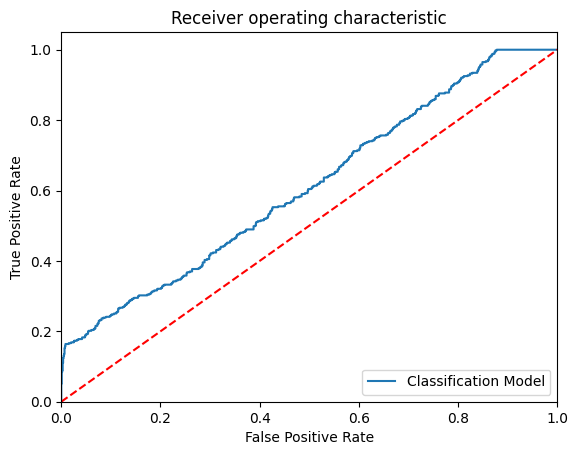

-----------------------------------------------------------------------------------------------------


In [19]:
# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)



# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);



# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)




# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [20]:
#Display the Final result 

Results = pd.DataFrame({'CreditCard_A':y_test,'CreditCard_p':y_pred})

#Merge two Dataframes on index of both the dataframes

ResultsFinal = BankDta_BK.merge(Results,left_index=True,right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CreditCard_A,CreditCard_p
1634,1635,59,34,18,95814,3,1.3,2,104,0,0,1,1,1,1,1
1961,1962,52,26,114,94304,1,4.9,1,0,0,0,0,0,0,0,0
3230,3231,65,40,48,94708,3,2.4,1,0,0,0,0,0,1,1,0
139,140,59,35,18,93305,1,1.2,3,0,0,0,0,1,0,0,0
833,834,61,35,63,94939,3,2.2,3,0,0,0,0,0,0,0,0
759,760,53,28,59,91950,2,1.9,2,0,0,0,0,1,0,0,0
4077,4078,26,0,71,92093,4,1.8,2,0,0,1,0,1,0,0,0
3277,3278,43,19,81,92121,2,3.2,1,0,0,0,0,1,0,0,0
1469,1470,59,35,59,90005,4,1.2,2,0,0,0,0,1,0,0,0
1593,1594,63,38,83,91320,3,1.8,2,0,0,0,0,1,0,0,0
